### This is a test for adding padding and new DFT lengths


In [2]:
import numpy as np
from scipy.signal import chirp, spectrogram
import simpleaudio as sa
from scipy.io.wavfile import write, read
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from transmitter import *
from reciever import *
import random

In [4]:
fs = 44100
class OFDM:
    pass
ofdm = OFDM()
ofdm.N = 2048                   # Length of DTF
ofdm.start_bin = 50
ofdm.end_bin = 788
ofdm.CP = 256                      
ofdm.sfp = 60                   # Symbols per frame

ofdm.num_tones = 21              # Number of pilot tones
ofdm.pilot_locs = np.int64(np.linspace(49,789,ofdm.num_tones))     # Pilot locations
ofdm.pilot_vals = np.array([1]*21)

ofdm.bps = 2                    # bits per symbol QFSK
ofdm.spb = 720                  # data symbols per block
ofdm.preamb = ofdm.N//2
ofdm.QFSK_dict = {              # The constellation
    (1,1) : -1-1j,
    (1,0) :  1-1j,
    (0,0) :  1+1j,
    (0,1) : -1+1j}

ofdm.pilot_vals

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
        ### Data forming With image
bit_array = bitsFromTiff('jaguar.tiff')

        ### Data from text
#bit_array = 
print('Length of bits', len(bit_array)/8)


payload = fullTrans(bit_array, ofdm)
#flat_payload = payload.flatten() / np.max(np.abs(payload.flatten()))
print("payload shape:",np.shape(payload))


        ### Pilot symbol for channel estimation
qfsk = np.array(list(ofdm.QFSK_dict.values()))
pilot_block = np.random.choice(qfsk, size=(int(ofdm.N/2-1)), replace=True)
pilot_symbs = goodSymbols(pilot_block, ofdm)
pilot_full = addGuard(inversedft(pilot_symbs), ofdm)
pilot_full = pilot_full.flatten() / np.max(np.abs(pilot_full.flatten()))


        ### Chirp makeing for sync
chirp_time = 5*(ofdm.N+ofdm.CP) / fs
t = np.linspace(0, chirp_time, int(chirp_time * fs), False)
note = chirp(t, f0=500, f1=15000, t1=chirp_time, method='linear')
chirp_symbol = note / np.max(np.abs(note))

Length of bits 26800.0


AttributeError: 'OFDM' object has no attribute 'rate'

In [8]:
plt.plot(payload.flatten()[50000:51000])
x = deconstruct(payload.flatten(), ofdm, numpy_func = True, channel_H = None, retSymbs = False)
bitsToSaveImage(x[:214400], 'trialpayload', 67, 100)

NameError: name 'payload' is not defined

In [ ]:
emtpy = np.zeros(ofdm.N)

frame = frameMaker(chirp_symbol, pilot_full, payload, ofdm.ofdmSymbolsPerFrame, zeros_post_sync=emtpy, zeros_post_sybm=emtpy)
print("Frame Shape:",np.shape(frame))
audio_for_file = audioMaker(frame, 'multiframetest1', fs)

print("audio file length (samples, seconds):",len(audio_for_file), len(audio_for_file)*1/fs)

NameError: name 'chirp_symbol' is not defined

In [ ]:
plt.figure(figsize = (30, 10))
plt.plot(audio_for_file[7500:12000])
print('Length of audio:',len(audio_for_file))
print('Expected length of audio:', (len(payload[0:5].flatten())+len(chirp_symbol)+len(emtpy)*2+len(pilot_full)))
print('Expected length of audio:', len(payload.flatten())+len(chirp_symbol)*42+len(emtpy)*42*2)

NameError: name 'audio_for_file' is not defined

<Figure size 2160x720 with 0 Axes>

In [8]:
record(15,fs,'testrecord4') 

In [ ]:
Fs, aud = read('big_frame_image.wav')

powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud, Fs=fs)
plt.show()

In [ ]:
plt.plot(np.correlate(aud, chirp_symbol, mode='full')[109200:109400])

In [ ]:
x = bitsFromTxt('jabberwocky.txt')
# bitsFromTiff('jaguar.tiff')

bitArrayToText(x)

'Twas brillig, and the slithy toves
Did gyre and gimble in the wabe:
All mimsy were the borogoves,
And the mome raths outgrabe.

"Beware the Jabberwock, my son!
The jaws that bite, the claws that catch!
Beware the Jubjub bird, and shun
The frumious Bandersnatch!"

He took his vorpal sword in hand;
Long time the manxome foe he sought-
So rested he by the Tumtum tree
And stood awhile in thought.

And, as in uffish thought he stood,
The Jabberwock, with eyes of flame,
Came whiffling through the tulgey wood,
And burbled as it came!

One, two! One, two! And through and through
The vorpal blade went snicker-snack!
He left it dead, and with its head
He went galumphing back.

"And hast thou slain the Jabberwock?
Come to my arms, my beamish boy!
O frabjous day! Callooh! Callay!"
He chortled in his joy.

'Twas brillig, and the slithy toves
Did gyre and gimble in the wabe:
All mimsy were the borogoves,
And the mome raths outgrabe.


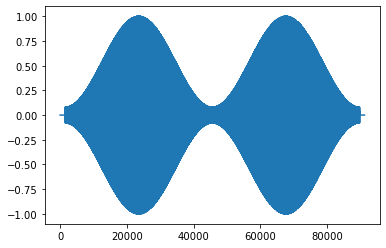

In [ ]:
plt.plot(double_chirp())

/Users/jamesskinner/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


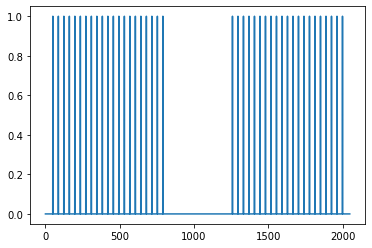

In [ ]:
#pilot_test = addpilots(np.zeros(720), ofdm)

plt.plot(goodSymbols([np.zeros(720)], ofdm)[0])

array([ 4100, 10091,  7869, ...,  7095,  1983, -6361], dtype=int16)

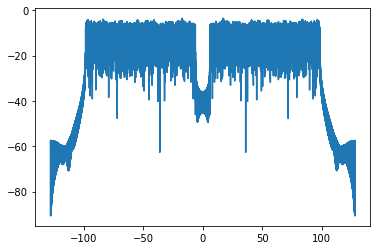

In [ ]:
exported_even, exported_odd = np.loadtxt('preamble_ofdm_symbols.csv',delimiter=',')
#plt.plot(exported_even)
#plt.plot(exported_odd)
f = np.linspace(-ofdm.CP/2, ofdm.CP/2, 4*len(exported_even), endpoint=False)
plt.plot(f, 20*np.log10(abs(np.fft.fftshift(np.fft.fft(exported_even, 4*len(exported_even))/np.sqrt(len(exported_even))))))
audioMaker(exported_even, 'evensc', fs)


In [ ]:
exported_coding = np.loadtxt('preamble_qpsk_symbols.csv', delimiter=',',dtype=complex)
exported_coding*1.41421356474619


array([-1.-1.j, -1.-1.j,  1.-1.j,  1.-1.j, -1.+1.j, -1.+1.j,  1.+1.j,
        1.+1.j, -1.+1.j, -1.-1.j, -1.+1.j, -1.+1.j,  1.-1.j,  1.-1.j,
        1.+1.j, -1.-1.j,  1.+1.j, -1.-1.j, -1.+1.j, -1.+1.j,  1.+1.j,
       -1.+1.j,  1.+1.j,  1.-1.j, -1.-1.j,  1.-1.j, -1.-1.j,  1.-1.j,
       -1.+1.j, -1.-1.j, -1.+1.j, -1.-1.j,  1.-1.j,  1.-1.j,  1.+1.j,
       -1.-1.j, -1.-1.j, -1.-1.j,  1.-1.j,  1.+1.j,  1.+1.j,  1.+1.j,
       -1.+1.j, -1.+1.j, -1.-1.j, -1.-1.j, -1.+1.j, -1.+1.j, -1.+1.j,
        1.+1.j, -1.-1.j,  1.+1.j, -1.-1.j, -1.-1.j, -1.+1.j,  1.-1.j,
       -1.-1.j, -1.-1.j, -1.+1.j, -1.-1.j, -1.-1.j,  1.-1.j, -1.-1.j,
       -1.+1.j,  1.+1.j, -1.+1.j, -1.+1.j, -1.-1.j, -1.+1.j, -1.+1.j,
        1.+1.j,  1.+1.j,  1.-1.j,  1.-1.j, -1.+1.j,  1.-1.j,  1.+1.j,
       -1.-1.j, -1.+1.j,  1.-1.j, -1.+1.j,  1.-1.j,  1.+1.j, -1.+1.j,
        1.+1.j,  1.-1.j, -1.+1.j,  1.-1.j,  1.+1.j,  1.+1.j, -1.+1.j,
        1.+1.j, -1.+1.j, -1.+1.j, -1.+1.j, -1.+1.j, -1.-1.j,  1.-1.j,
       -1.-1.j,  1.+

In [7]:
record(15,fs,'fullframetest2')

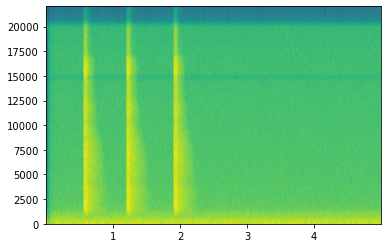

[-2.1593482e-12  6.9056860e-08  4.1364360e-06 ... -8.2585309e-04
 -8.1490172e-04 -7.7586813e-04]


KeyboardInterrupt: 

In [ ]:
Fs, auds = read('evensctest.wav')

powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(auds, Fs=fs)
plt.show()
print(auds)
plt.plot(SchmidlCoxDecoder(auds,ofdm))

In [ ]:
d_set = np.arange(0, len(auds))

array([     0,      1,      2, ..., 220497, 220498, 220499])